<h1><span style="color:blue">SVM</span></h1>

Muestra separabilidad no lineal aunque parezca que separa las clases con una linea

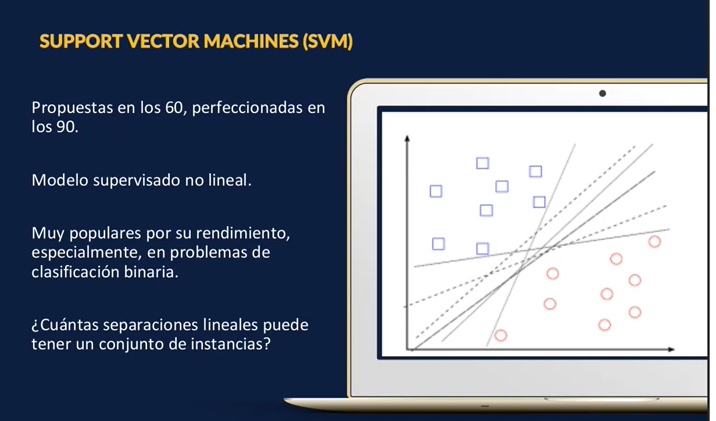

In [1]:
from IPython.display import Image
Image(filename='img/1.PNG') 

En la imagen se ven varias lineas dibujadas(Hiper planos de separacion entre clases)


**Cual sería el plano de separacion optimo?**

Usualmente la gente escoje la más vertical, lo cual es incorecto.

Precisamente la SVM busca la separacion optima.

Lo **óptimo** es aquel que maximiza la distancia entre los patrones que estan en el borde mas cercanos a la frontera entre ambos.  Aquellos que maxifican la distancia entre clases.

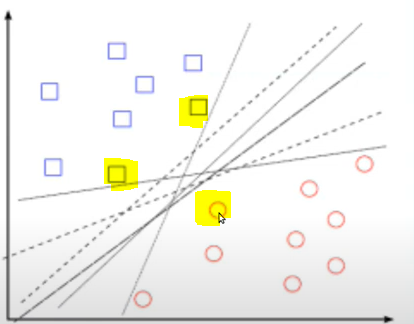

In [3]:
from IPython.display import Image
Image(filename='img/2.PNG') 

Lo que se trata es de encontrar un hiperplano que maximice la distancia entre esos patrones y el hiperplano optimo. Busca los datos que están en el limite entre los patrones más cercanos de los dos.

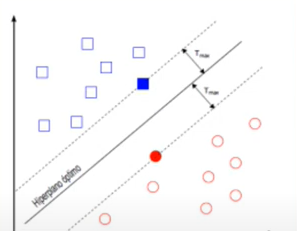

In [4]:
from IPython.display import Image
Image(filename='img/3.PNG') 

Si tengo un espacio de dos dimensiones y tengo que encontrar la separacion lineal entre estas dos clases. 

**Donde puedo hacer una separacion lineas entre las clases?**

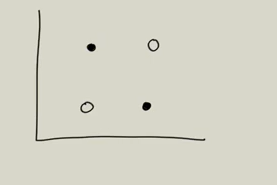

In [5]:
from IPython.display import Image
Image(filename='img/4.PNG') 

Como no se puede separar de forma lineal tenemos que proyectar una tercera dimension. Cuando meto la tercera diminsion los puntos negros quedan detras y los blancos delante.

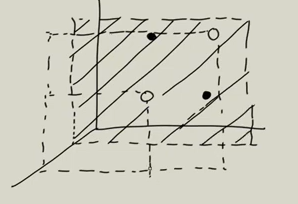

In [6]:
from IPython.display import Image
Image(filename='img/5.PNG') 

En estos casos tampoco puede haber una separacion lineal . Entonces meto un tercer plano y puedo dividirlo arriba y abajo metiendo una funcion gaussiana.

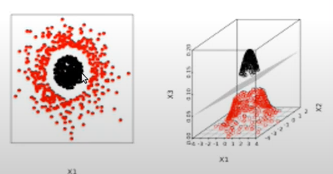

In [7]:
from IPython.display import Image
Image(filename='img/6.PNG') 

Entonces lo que se hace es meterla tercera dimension para separar en un plano aparte en donde pueda trabajar ese plano de manera lineal.

Pero esto requiere mucho costo computacional, entonce realiza un **KERNEL TRICK** que consiste en averiguar la **DISTANCIA**. Ya con eso buscamos el hiperplano sde separacion optimo.

COmo se utiliza **Distancia++ Es necesario el escalado de los datos, porque sino tengo desequilibrio s importantes.

Siempre que se utilice distancia es necesario escalar datos.



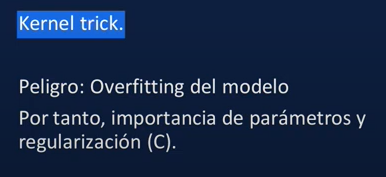

In [8]:
from IPython.display import Image
Image(filename='img/7.PNG') 

Entonces lo primero que hace es sacar el hiperplano optimo.
    
Sin embargo pertime que algunos puntos queden en el lado erroneo.

Esto tiene una penalizacion en el entrenamiento , pero a la hora de la generalizacion  el rendimiento será mejor y reduzca el OVERFITING.


El termino de penalizacion es **C** (parametro de regularizacion.) para los parametros que quedaron mal clasificados.

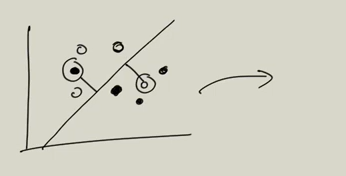

In [9]:
from IPython.display import Image
Image(filename='img/8.PNG') 

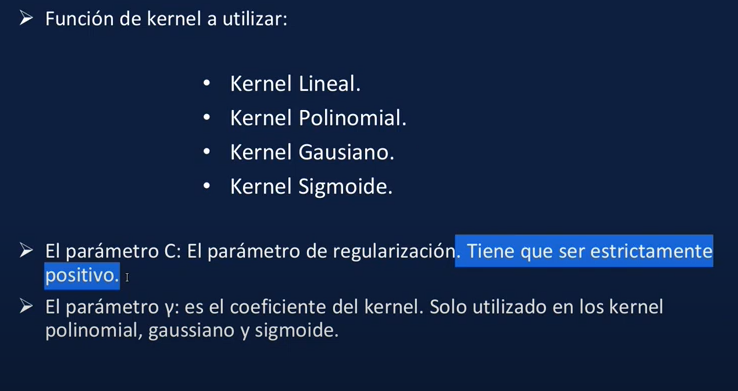

In [10]:
from IPython.display import Image
Image(filename='img/9.PNG') 

CONSEJO: La unica manera de encontra el valor optimo es CROSSVALIDAR
    
Es igual como validabamos la K en KNN

VEr con que valor de **C** y **Y** funcionan para el modelo

Es decir que para cada conjunto de datos tenemos que encontrarlos parametros nuevamente.

Una buena practicca es hacer crossfit con el siguiente rango de valores.


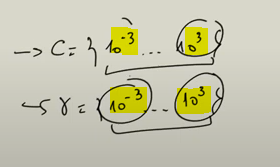

In [11]:
from IPython.display import Image
Image(filename='img/10.PNG') 

Esto se logra con un bucle ifanidado que interactue dentro de ese rango. Y vamos evaluando la combinacion de parametros que mejor funcione-

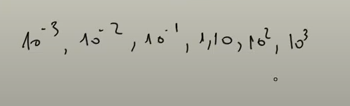

In [13]:
from IPython.display import Image
Image(filename='img/11.PNG') 

<h1><span style="color:blue">SVM implementación</span></h1>

NO se aconseja utilizar SVM para regresion

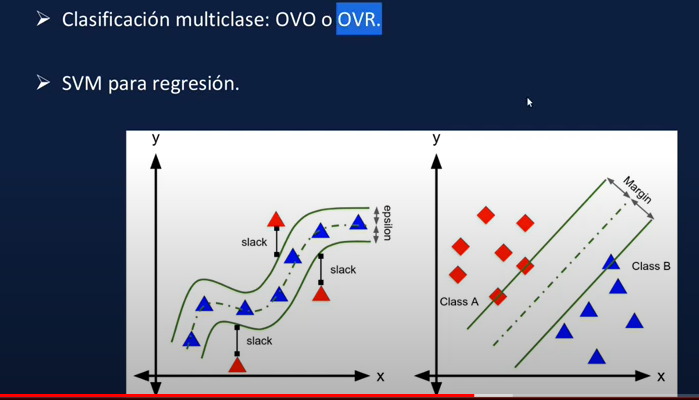

In [15]:
from IPython.display import Image
Image(filename='img/12.PNG') 

In [31]:
import numpy as np
import pandas as pd
import random, time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [32]:
df = pd.read_csv("indian_liver_patient.csv")
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

#### Primero

Divido los datos entre los inputs y el output

In [33]:
input_data = df[df.columns[:-1]]
input_data = input_data.fillna(0)

X = input_data
Y = df['Dataset']


#### Segundo

Divido con la funcion **train_test_split**

Le paso todo el conjunto de datos

Ento me divide en 70% para entrenamiento y 30% para test

In [34]:
test_portion = 0.3

seed = random.randint(0,10)

# Aqui genero 4 dataframes nuevos (2 train, 2 test) 
#Usamos el 30% de instancias para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_portion, random_state=seed)

<h3><span style="color:red">Escalado de datos</span></h3>

Separar las variables que sean de tipo numerico de las categoricas.
Y con **EstandardScaler** le aplico un escaldo a esas variables numericas.

#### **NUMERICAS** ---------------> StandardScaler

In [47]:
num_X_train = X_train.select_dtypes(include=['int','float'])
num_X_test = X_test.select_dtypes(include=['int','float'])

In [48]:
stdScaler = StandardScaler()
stdScaler.fit(num_X_train)

StandardScaler()

Variables categoricas que he generado con el conjunto de entrenamiento.

In [49]:
resc_X_train = pd.DataFrame(stdScaler.transform(num_X_train),columns=num_X_train.columns)
resc_X_test = pd.DataFrame(stdScaler.transform(num_X_test),columns=num_X_test.columns)

#### **CATEGORICAS** ---------------> OneHotEncoding

En este caso no tengo ninguna variable de tipo numerico.

La funcion **.select_dtypes()** devuelve un dataframe

In [38]:
cat_X_train = X_train.select_dtypes(include=['object'])
cat_X_test = X_test.select_dtypes(include=['object'])

**Instancio la clase ONEHOT ENCODER**

Genero un objeto para trabajar con él 

COmo solo tengo dos clases elimino el segundo parametro del objeto.

Si tueviera mas clases lo agrego ahí

In [39]:
ohe = OneHotEncoder(drop = 'if_binary')

Ahora entreno y genero un **modelo de transformacion** con OneHot Encoder

Va a mirar en las variables catagoricas cuantas etiquetas diferentes hay, y se las va a guardar

Para cada etiqueta generar una transformacion

El modelo ha sido creado solamente con los datos de **entrenamiento**

In [40]:
ohe.fit(cat_X_train)

OneHotEncoder(drop='if_binary')

Ahora transformo esas variabels categoricas del conjunto de entrenamiento con el **objeto** que he creado, y que ya previmente he entrenado

De esta manera genero un modelo de transformacion

Es decir un nuevo dataframe con los datos ya trasformados:

- <span style="color:red">Los datos Categoricos pasados a numericos</span>
- <span style="color:red">Los datos Numericos escalados</span>

In [41]:
resc_X_train[ohe.get_feature_names_out()] = ohe.transform(cat_X_train).toarray()
resc_X_test[ohe.get_feature_names_out()] = ohe.transform(cat_X_test).toarray()

<h3><span style="color:green">CREO MODELO SVC</span></h3>

<span style="color:red">C</span> ------------

<span style="color:red">class weight</span> ------------ Es un parametro util en un problmea de **DESQUILIBRIO**. Por defecto viene  que todas las clases tienen los mismo patrones.

<span style="color:red">Kernel</span> ------------  Utilizo el Sigmoide y no el gaussiano que viene por defecto

<span style="color:red">gammas</span>------------ Puende ser un numero o lo podemor dejar adaptativo (SCALADO)

Es mejor hacer el bucle para conseguir la mejor conbinacion entre Gamba y C

**AQUI VA EL BUCLE**



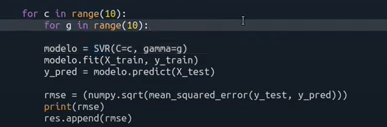

In [1]:
from IPython.display import Image
Image(filename='img/14.PNG') 

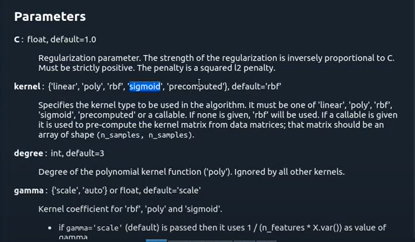

In [50]:
from IPython.display import Image
Image(filename='img/13.PNG') 

In [42]:
modelo = SVC(C=10, class_weight='balanced', kernel='sigmoid',gamma=0.01)

# ALimento mi modelo unicamente con los patrones de entrenamiento.
modelo.fit(resc_X_train, y_train)

SVC(C=10, class_weight='balanced', gamma=0.01, kernel='sigmoid')

Averiguo el rendimiento de las distintas metricas.

Lo utilizo como parametro para averiguar las metricas.

In [43]:
y_pred= modelo.predict(resc_X_test)

In [45]:
cm = confusion_matrix(y_test,y_pred)
acc = balanced_accuracy_score(y_test, y_pred)

In [46]:
print(cm,acc)

[[46 77]
 [ 3 49]] 0.6581457160725454


### TIP

SVM funciona mejor cunado hay muchas columnas y pocas filas

